## Import packages

Package PIL is needed in order to work with images. Other packages are for Qiskit Metal

In [1]:
from PIL import Image
import numpy as np

from qiskit_metal import draw, Dict
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal

In [2]:
design = metal.designs.DesignPlanar()

In [3]:
dir(QComponent)

['TOOLTIP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__i_am_component__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_to_design',
 '_check_pin_inputs',
 '_delete_evaluation',
 '_gather_all_children_metadata',
 '_gather_all_children_options',
 '_get_specific_table_values_from_renderers',
 '_get_table_values_from_renderers',
 '_get_unique_class_name',
 '_is_name_used',
 '_register_class_with_design',
 'add_dependency',
 'add_pin',
 'add_qgeometry',
 'class_name',
 'component_metadata',
 'connect_components_already_in_design',
 'default_options',
 'delete',
 'design',
 'get_pin',
 'get_template_options',
 'id',
 'logger',
 'make',
 'name',
 'options',
 'parse_options',
 'parse_value',
 'pin_names',
 

## Component (logo) definition

In this section we define our logo. 
USER MUST: INCLUDE PATH TO IMAGE FILE
USER CAN: adjust position of logo by adjusting offset values
USER CAN: adjust scale of logo by scale value

In [4]:
class MyQComponent(QComponent):
    """
    Use this class as a template for your components - have fun

    Description:

    Options:
    """

    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(width='500um',
                           height='300um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component',
                             _qgeometry_table_poly='True')
    """Component metadata"""
    
    def make(self):
        """Convert self.options into QGeometry."""
        p = self.parse_options()  # Parse the string options into numbers
        # EDIT HERE - Replace the following with your code
        
        
        """User input here"""
        #CODE FOR LOGO IMPORT MADE BY SIMON MAREK
        with Image.open("download.jpg") as im:
            offsetx = 10 # HERE YOU CAN MOVE IMAGE
            offsety = 3 # HERE YOU CAN MOVE IMAGE
            scale = 0.125 # HERE YOU CAN CHANGE SCALE OF IMAGE
            
            
            """Image processing here"""
            im=im.convert("1")
            im = im.transpose(Image.ROTATE_270)
            numpydata = np.asarray(im)
            
            
            """Debugging here"""
            print(im.height)
            print(im.width)
            #im.show()
            #print (numpydata)
            #print (numpydata[1][2])
            
            """Image drawing here"""
            fwidth=(im.width)-1
            fheight=(im.height)
            
            logo = draw.rectangle((im.height-1)*scale,(im.width-1)*scale,(((im.height-1)/2)*scale)+offsetx,(((im.width-1)/2)*scale)+offsety)
            for x in range(fheight):
                    for y in range(fwidth):
                        if False == (numpydata[x][y]):
                            logo1 = draw.rectangle(1*scale,1*scale,(x*scale)+offsetx+(0.5*scale),(y*scale)+offsety+(0.5*scale))
                            logo = draw.subtract(logo, logo1)
            logo
        geom = {'my_polygon': logo}
        self.add_qgeometry('poly', geom, layer=p.layer, subtract=False)

## Etch rectangle

User might want to add etch rectangle around logo. Please substitute x,y,posx,posy by cordinates of your etch rectangle

In [5]:
        #etch=draw.rectangle(x,y,posx,posy) #Please substitute x,y,posx,posy by cordinates of your etch rectangle
        #self.add_qgeometry('poly', dict(etch=etch), subtract=True)

In [6]:
design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)

## Render to Qiskit Metal

  im = im.transpose(Image.ROTATE_270)



249
140


  im = im.transpose(Image.ROTATE_270)



249
140


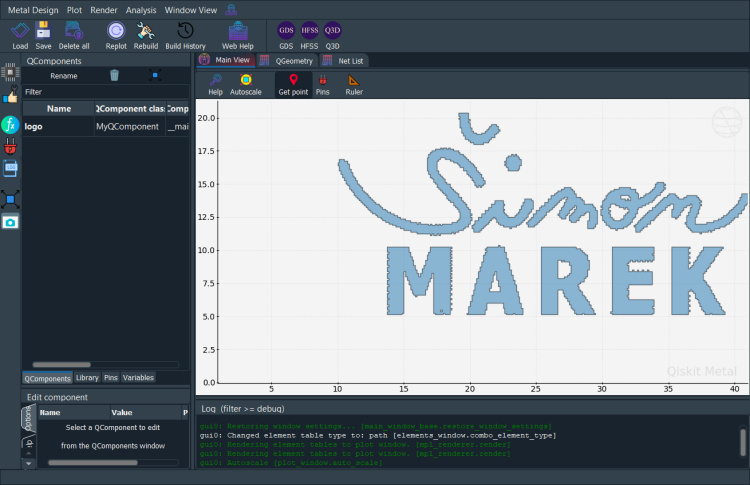

In [7]:
face = MyQComponent(design,'logo')
gui.rebuild()
gui.autoscale()
gui.screenshot()